Transform data

In [8]:
import pandas as pd

# Load the data
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/Error_PrecentageofEachmodel_02.csv")

# Pivot the dataframe to get the 'Predict' values in wide format
df_predict = data.pivot(index='Plot', columns='Model', values='Predict').reset_index()
df_predict.columns = ['Plot'] + [f"Predict_{col}" for col in df_predict.columns[1:]]

# Pivot the dataframe to get the 'Accuracy' values in wide format
df_accuracy = data.pivot(index='Plot', columns='Model', values='Accuracy').reset_index()
df_accuracy.columns = ['Plot'] + [f"Accuracy_{col}" for col in df_accuracy.columns[1:]]

# Merge both dataframes on 'Plot'
final_df = pd.merge(df_predict, df_accuracy, on='Plot')

# Get the 'Actual Harvesting' values
actual_harvesting = data[data['Model'].isna()][['Plot', 'Actual Harvesting']]
final_df = pd.merge(final_df, actual_harvesting, on='Plot')

# Reorder columns
cols = ['Plot', 'Actual Harvesting'] + [col for col in final_df.columns if col not in ['Plot', 'Actual Harvesting']]
final_df = final_df[cols]

print(final_df)
# Save the updated DataFrame
final_df.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/Error_PrecentageofEachmodel_Tranform.csv", index=False)



   Plot Actual Harvesting  Predict_nan  Predict_Breeder  Predict_Huber  \
0     1          1,314.44          NaN           503.19         986.23   
1     2            236.92          NaN           332.87         258.20   
2     3            387.82          NaN           342.67         345.22   

   Predict_Linear Regression  Predict_M-estimators  Predict_PEnsemble 1  \
0                     998.47                991.44               990.30   
1                     262.01                259.58               259.48   
2                     348.57                346.97               346.36   

   Predict_PEnsemble 2  Predict_PEnsemble 3  ...  Accuracy_nan  \
0               990.50               990.61  ...           NaN   
1               259.45               259.65  ...           NaN   
2               346.50               346.39  ...           NaN   

   Accuracy_Breeder  Accuracy_Huber  Accuracy_Linear Regression  \
0              0.38            0.75                        0.76   
1  

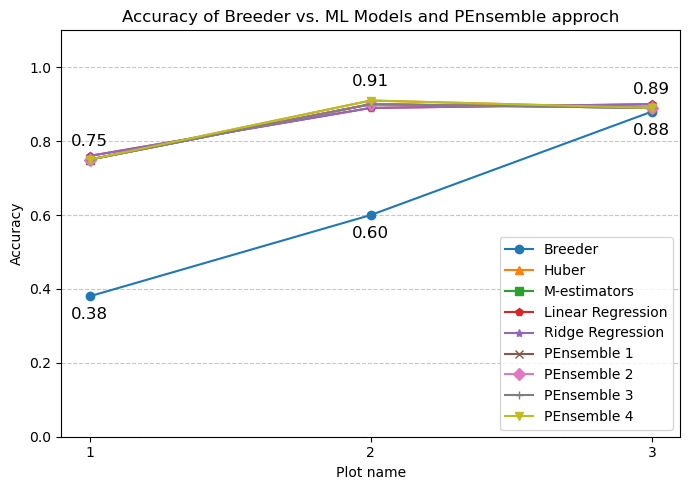

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/Error_PrecentageofEachmodel_Tranform.csv")

# Models for comparison
models = ["Breeder", "Huber", "M-estimators", "Linear Regression", 
          "Ridge Regression", "PEnsemble 1", "PEnsemble 2", 
          "PEnsemble 3", "PEnsemble 4"]

# Plot settings
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22"]
markers = ["o", "^", "s", "p", "*", "x", "D", "+", "v"]

# Visualizing the results
plt.figure(figsize=(7, 5))

# for model, color, marker in zip(models, colors, markers):
#     plt.plot(data["Plot"], data[f"Accuracy_{model}"], label=model, 
#              color=color, marker=marker)
#     if model in ["Breeder", "PEnsemble 4"]:
#         for i, txt in enumerate(data[f"Accuracy_{model}"]):
#             plt.annotate(f"{txt:.2f}", (data["Plot"][i], data[f"Accuracy_{model}"][i] + 0.03),
#                          fontsize=12, ha='center')
for model, color, marker in zip(models, colors, markers):
    plt.plot(data["Plot"], data[f"Accuracy_{model}"], label=model, 
             color=color, marker=marker)
    
    if model == "Breeder":
        for i, txt in enumerate(data[f"Accuracy_{model}"]):
            plt.annotate(f"{txt:.2f}", (data["Plot"][i], data[f"Accuracy_{model}"][i] - 0.03),
                         fontsize=12, ha='center', va='top')
    
    elif model == "PEnsemble 4":
        for i, txt in enumerate(data[f"Accuracy_{model}"]):
            plt.annotate(f"{txt:.2f}", (data["Plot"][i], data[f"Accuracy_{model}"][i] + 0.03),
                         fontsize=12, ha='center', va='bottom')

plt.title("Accuracy of Breeder vs. ML Models and PEnsemble approch")
plt.xlabel("Plot name")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=[1, 2, 3], labels=['1', '2', '3'])  # Set x-axis ticks to only 1, 2, 3
plt.legend(loc='lower right')
plt.ylim(0, 1.1)  # Adjusting the y-axis to accommodate annotations
plt.tight_layout()
plt.show()


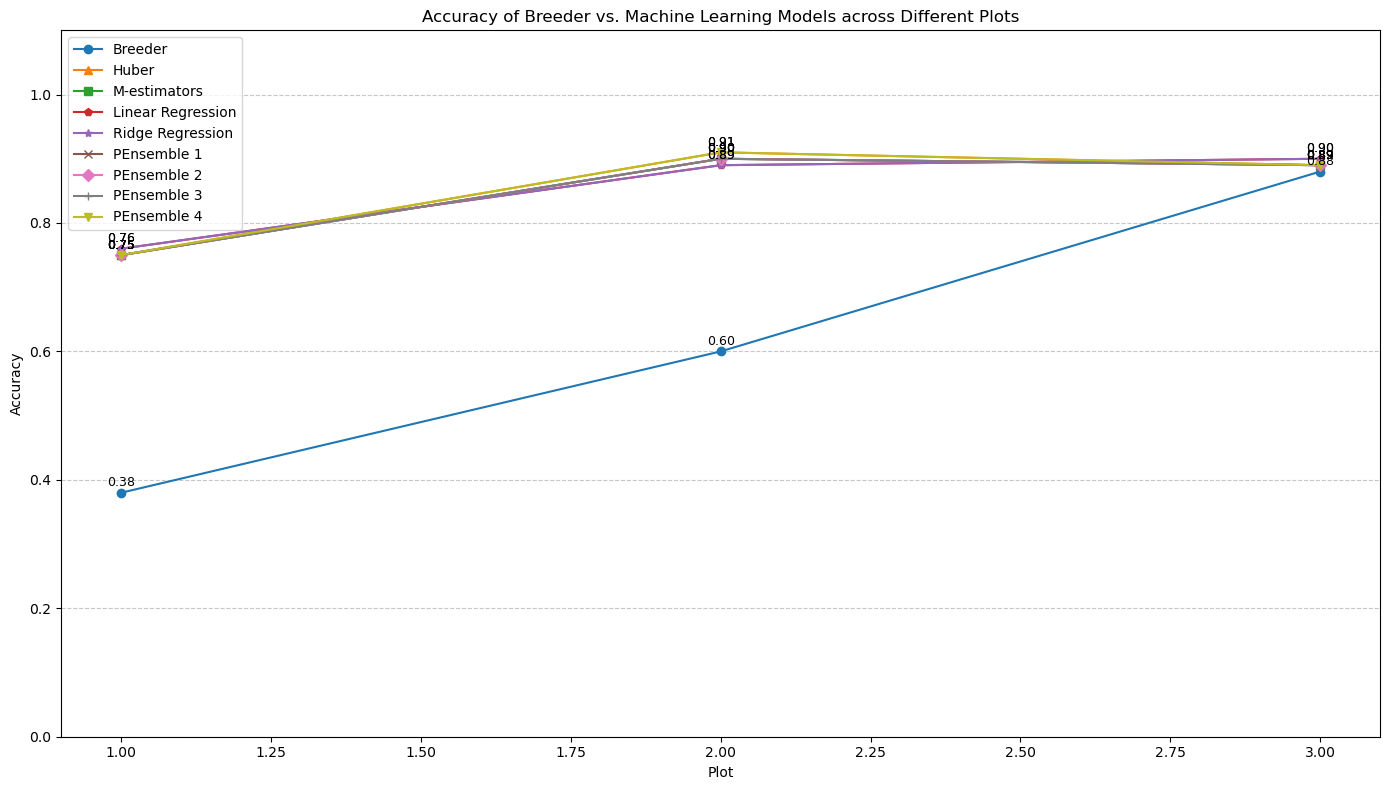

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/Error_PrecentageofEachmodel_Tranform.csv")

# Models for comparison
models = ["Breeder", "Huber", "M-estimators", "Linear Regression", 
          "Ridge Regression", "PEnsemble 1", "PEnsemble 2", 
          "PEnsemble 3", "PEnsemble 4"]

# Plot settings
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22"]
markers = ["o", "^", "s", "p", "*", "x", "D", "+", "v"]

# Visualizing the results
plt.figure(figsize=(14, 8))

for model, color, marker in zip(models, colors, markers):
    plt.plot(data["Plot"], data[f"Accuracy_{model}"], label=model, 
             color=color, marker=marker)
    for i, txt in enumerate(data[f"Accuracy_{model}"]):
        plt.annotate(f"{txt:.2f}", (data["Plot"][i], data[f"Accuracy_{model}"][i] + 0.01),
                     fontsize=9, ha='center')

plt.title("Accuracy of Breeder vs. Machine Learning Models across Different Plots")
plt.xlabel("Plot name")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.ylim(0, 1.1)  # Adjusting the y-axis to accommodate annotations
plt.tight_layout()
plt.show()



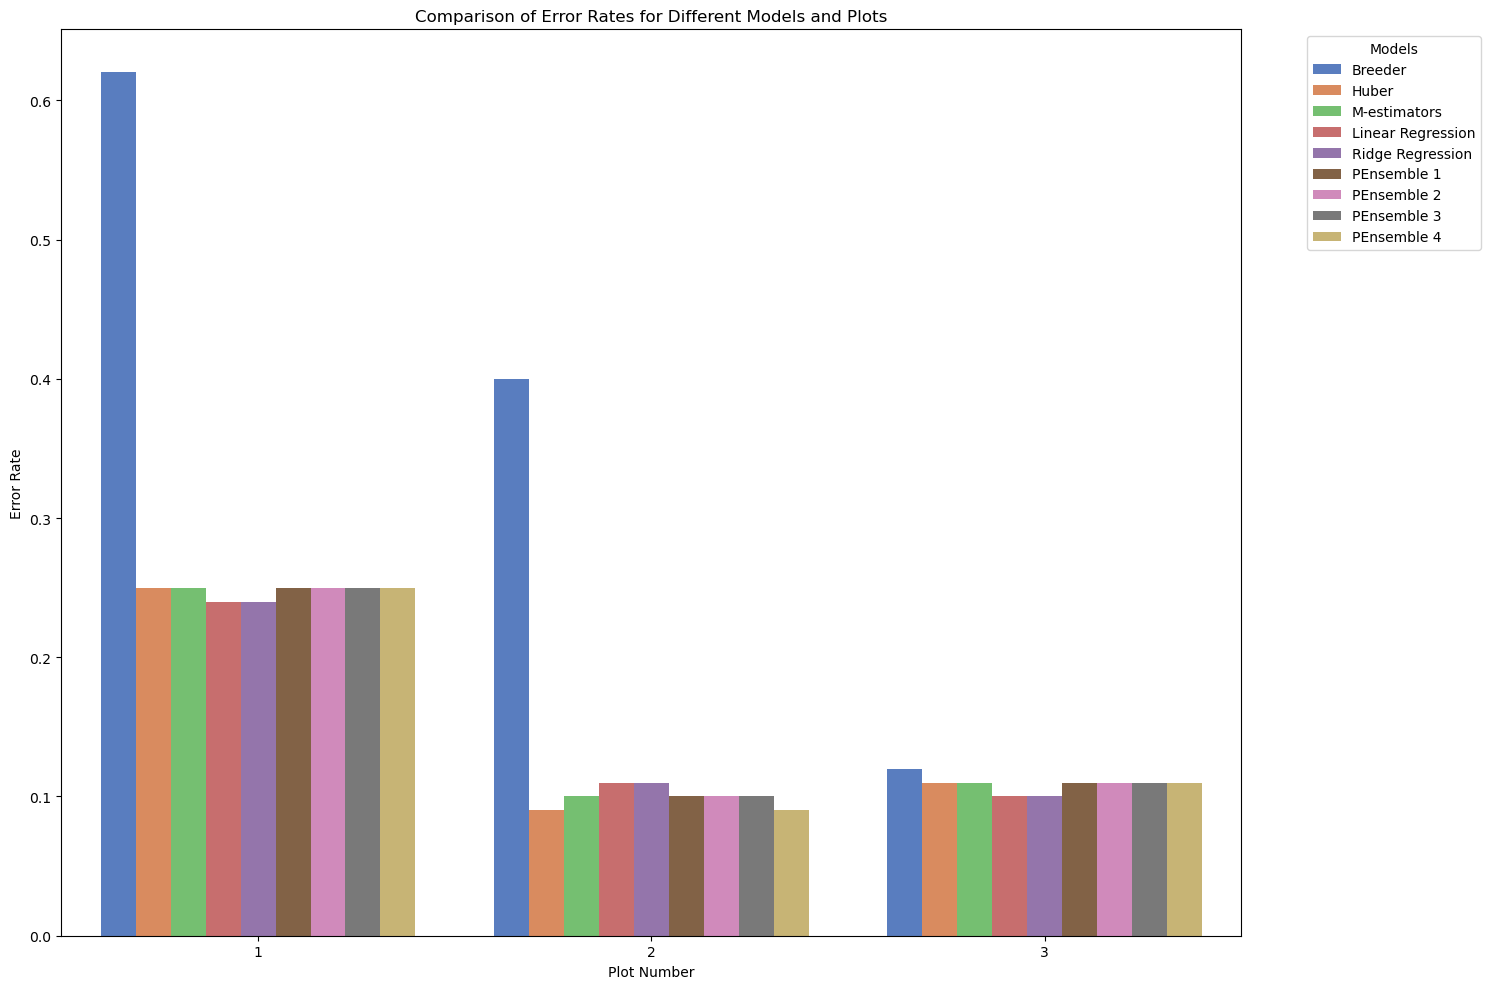

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/Error_PrecentageofEachmodel_02.csv")

# Filter relevant columns
plot_data = data.melt(id_vars=['Plot', 'Model'], value_vars=['Error'], var_name='Metric', value_name='Value')

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(data=plot_data, x='Plot', y='Value', hue='Model', palette="muted")
plt.title("Comparison of Error Rates for Different Models and Plots")
plt.ylabel("Error Rate")
plt.xlabel("Plot Number")
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Features based on SHAP Values
X = data[['Cire_CD', 'NDRE_CD']]
y = data['Seed']

# Splitting the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#######################################
# Best hyperparameters obtained from previous runs
best_params = {
    "Huber": {'alpha': 1, 'epsilon': 1.0, 'max_iter': 100},
    "M-estimators": {'min_samples': 0.6, 'stop_probability': 0.97},
    "Linear Regression": {'fit_intercept': True},
    "Ridge Regression": {'alpha': 0.615848211066026, 'fit_intercept': True, 'solver': 'sparse_cg'}
}

# Initialize models with default parameters
default_models = {
    "Huber": HuberRegressor(),
    "M-estimators": RANSACRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge()
}

###########################################

# Initialize models with best parameters
tuned_models = {
    "Huber": HuberRegressor(**best_params["Huber"]),
    "M-estimators": RANSACRegressor(**best_params["M-estimators"]),
    "Linear Regression": LinearRegression(**best_params["Linear Regression"]),
    "Ridge Regression": Ridge(**best_params["Ridge Regression"])
}

# Define ensemble methods with weights
ensemble_methods = {

   "Method 1": {"models": ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"], "weights": [0.5, 0.3, 0.1, 0.1]},  #0.924202
   "Method 2": {"models": ["Huber", "M-estimators", "Linear Regression"], "weights": [0.45, 0.35, 0.2]}, #0.924131
   "Method 3": {"models": ["Huber", "M-estimators", "Ridge Regression"], "weights": [0.45, 0.35, 0.2]}, #0.924017
    "Method 4": {"models": ["Huber", "M-estimators"], "weights": [0.6, 0.4]} #0.925427

}
 
results = []

# Compute weighted ensemble predictions
for method, details in ensemble_methods.items():
    predictions = np.zeros(X_test_scaled.shape[0])
    for model_name, weight in zip(details["models"], details["weights"]):
        model = tuned_models[model_name]
        model.fit(X_train_scaled, y_train)
        predictions += weight * model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    results.append({
        "Method": method,
        "Model": ", ".join(details["models"]),
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

results_df = pd.DataFrame(results)
print(results_df)


     Method                                              Model       MAE  \
0  Method 1  Huber, M-estimators, Linear Regression, Ridge ...  0.308433   
1  Method 2             Huber, M-estimators, Linear Regression  0.308890   
2  Method 3              Huber, M-estimators, Ridge Regression  0.311677   
3  Method 4                                Huber, M-estimators  0.291894   

        MSE      RMSE        R2  
0  0.531334  0.728926  0.924202  
1  0.531836  0.729271  0.924131  
2  0.532635  0.729818  0.924017  
3  0.522753  0.723016  0.925427  


# Predict with unseen data

In [5]:
import pandas as pd
# Load the unseen data
#unseen_data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/Plot1_Unseendata_1393.csv")
#unseen_data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/unseen_data_Plot1.csv")
#unseen_data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/unseen_data_Plot2.csv")
unseen_data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/unseen_data_Plot3.csv")


# Extract features from the unseen data
X_unseen = unseen_data[['Cire_CD', 'NDRE_CD']]

# Scale the features using the trained scaler
X_unseen_scaled = scaler.transform(X_unseen)

# Compute ensemble predictions for the unseen data
ensemble_predictions = {}

for method, details in ensemble_methods.items():
    predictions = np.zeros(X_unseen_scaled.shape[0])
    for model_name, weight in zip(details["models"], details["weights"]):
        model = tuned_models[model_name]
        # Note: No need to fit the model again, as they were already fitted during training
        predictions += weight * model.predict(X_unseen_scaled)
    ensemble_predictions[method] = predictions

## Add the ensemble predictions to the unseen data
# Here we're taking the predictions from Method 1, but you can change it as per your requirement
#unseen_data['Seed'] = ensemble_predictions["Method 1"]

## For each method, create a new column in the DataFrame and store its predictions
# for method in ensemble_methods.keys():
#     column_name = f"Seed_{method}"
#     unseen_data[column_name] = ensemble_predictions[method]

## Save the updated DataFrame if needed
 #unseen_data.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/predicted_unseen_data4_Method.csv", index=False)

# Predict using each model
predictions = {}
for name, model in tuned_models.items():
    model.fit(X_train_scaled, y_train)
    predictions[name] = model.predict(X_unseen_scaled)
    unseen_data[f"Predicted_{name}"] = predictions[name]  # Store individual model predictions

# Compute weighted ensemble predictions as before
for method, details in ensemble_methods.items():
    predictions_ensemble = np.zeros(X_unseen_scaled.shape[0])
    for model_name, weight in zip(details["models"], details["weights"]):
        predictions_ensemble += weight * predictions[model_name]
    
    ensemble_predictions[method] = predictions_ensemble
    unseen_data[f"Seed_{method}"] = ensemble_predictions[method]  # Store ensemble predictions

# Save the updated DataFrame
unseen_data.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/predicted_unseen_dataAllmodel_Method_Plot3.csv", index=False)


# Overall Plot

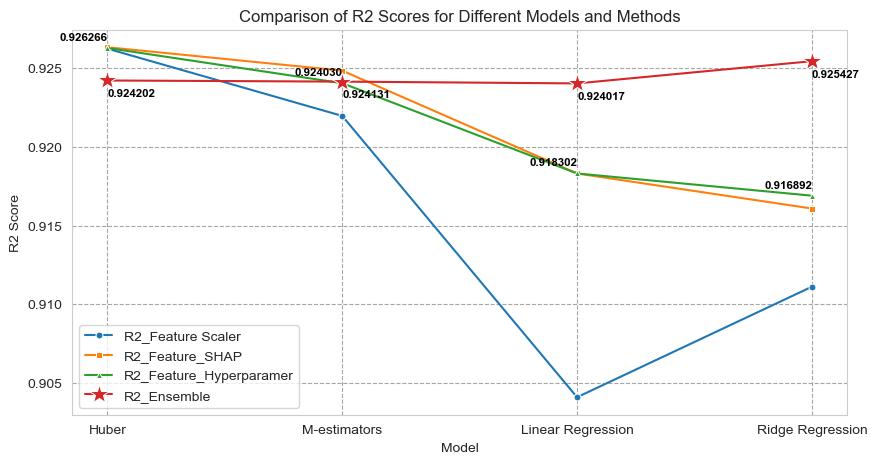

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    "Model": ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"],
    "R2_Feature Scaler": [0.926222, 0.921954, 0.904104, 0.911118],
    "R2_Feature_SHAP": [0.926313, 0.924826, 0.918302, 0.916077],
    "R2_Feature_Hyperparamer": [0.926266, 0.924030, 0.918302, 0.916892],
    "R2_Ensemble": [0.924202, 0.924131, 0.924017, 0.925427],
    # "Method": [
    #     "Method1 Huber,M-estimators,Linear Regression,Ridge Regression",
    #     "Method2 Huber,M-estimators,Linear Regression",
    #     "Method3 Huber,M-estimators,Ridge Regression",
    #     "Method4 Huber,M-estimators",
    # ],
        "Method": [
        "Method1",
        "Method2",
        "Method3",
        "Method4",
    ],
}

df = pd.DataFrame(data)

# Setting the order for the models
order = ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"]

# # Plotting the data
# plt.figure(figsize=(10, 5))
# sns.lineplot(x="Model", y="R2_Feature Scaler", data=df, marker="o", markersize=5, label="R2_Feature Scaler", sort=False)
# sns.lineplot(x="Model", y="R2_Feature_SHAP", data=df, marker="s", markersize=5, label="R2_Feature_SHAP", sort=False)
# sns.lineplot(x="Model", y="R2_Feature_Hyperparamer", data=df, marker="^", markersize=5, label="R2_Feature_Hyperparamer", sort=False)
# sns.lineplot(x="Model", y="R2_Ensemble", data=df, marker="*", markersize=15, label="R2_Ensemble", sort=False)

# # Annotating the methods on the plot
# for i, row in df.iterrows():
#     plt.text(row["Model"], row["R2_Ensemble"] + 0.001, row["Method"], horizontalalignment='left', size='small', color='black', weight='semibold')

# plt.title("Comparison of R2 Scores for Different Models and Methods")
# plt.ylabel("R2 Score")
# plt.grid(True, which="both", ls="--", c='0.65')
# plt.legend()
# plt.show()

# Plotting the data
plt.figure(figsize=(10, 5))
sns.lineplot(x="Model", y="R2_Feature Scaler", data=df, marker="o", markersize=5, label="R2_Feature Scaler", sort=False)
sns.lineplot(x="Model", y="R2_Feature_SHAP", data=df, marker="s", markersize=5, label="R2_Feature_SHAP", sort=False)
sns.lineplot(x="Model", y="R2_Feature_Hyperparamer", data=df, marker="^", markersize=5, label="R2_Feature_Hyperparamer", sort=False)
sns.lineplot(x="Model", y="R2_Ensemble", data=df, marker="*", markersize=15, label="R2_Ensemble", sort=False)

# Annotating the R2_Ensemble values on the plot
for i, row in df.iterrows():
    plt.text(row["Model"], row["R2_Ensemble"] - 0.001, f"{row['R2_Ensemble']:.6f}", horizontalalignment='left', size='small', color='black', weight='semibold')
    plt.text(row["Model"], row["R2_Feature_Hyperparamer"] + 0.0005, f"{row['R2_Feature_Hyperparamer']:.6f}", horizontalalignment='right', size='small', color='black', weight='semibold')


plt.title("Comparison of R2 Scores for Different Models and Methods")
plt.ylabel("R2 Score")
plt.grid(True, which="both", ls="--", c='0.65')
plt.legend()
plt.show()


Finding weigth of model

In [84]:
# Given RMSE values
rmse_values = {
    "Huber": 0.718933409,
    "M-estimators": 0.72975479,
    "Linear Regression": 0.756767123,
    "Ridge Regression": 0.763266973
}

# Compute inverse error weights
inverse_error_weights = {model: 1/rmse for model, rmse in rmse_values.items()}

# Normalize the weights
total_weight = sum(inverse_error_weights.values())
normalized_weights = {model: weight/total_weight for model, weight in inverse_error_weights.items()}

# Calculate ensemble weights for each method
ensemble_weights = {
    "Method 1": [normalized_weights[model] for model in ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"]],
    "Method 2": [normalized_weights[model] for model in ["Huber", "M-estimators", "Linear Regression"]],
    "Method 3": [normalized_weights[model] for model in ["Huber", "M-estimators", "Ridge Regression"]],
    "Method 4": [normalized_weights[model] for model in ["Huber", "M-estimators"]]
}

ensemble_weights


{'Method 1': [0.2579251773458206,
  0.2541004588899792,
  0.2450305006394422,
  0.24294386312475802],
 'Method 2': [0.2579251773458206, 0.2541004588899792, 0.2450305006394422],
 'Method 3': [0.2579251773458206, 0.2541004588899792, 0.24294386312475802],
 'Method 4': [0.2579251773458206, 0.2541004588899792]}

In [77]:
# Given R2 values for models
r2_values = {
    "Huber": 0.926266375,
    "M-estimators": 0.924029994,
    "Linear Regression": 0.918301748,
    "Ridge Regression": 0.916892313
}

# Define ensemble methods and their models
ensemble_methods = {
    "Method 1": ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"],
    "Method 2": ["Huber", "M-estimators", "Linear Regression"],
    "Method 3": ["Huber", "M-estimators", "Ridge Regression"],
    "Method 4": ["Huber", "M-estimators"]
}

# Calculate weights for each method
weights_based_on_r2 = {}

for method, models in ensemble_methods.items():
    total_r2 = sum(r2_values[model] for model in models)
    weights = [r2_values[model] / total_r2 for model in models]
    weights_based_on_r2[method] = weights

weights_based_on_r2


{'Method 1': [0.2513278470241476,
  0.2507210401303362,
  0.24916677045882332,
  0.2487843423866929],
 'Method 2': [0.3345615130316149, 0.3337537464633044, 0.3316847405050807],
 'Method 3': [0.3347319180022578, 0.33392374000754893, 0.3313443419901932],
 'Method 4': [0.5006043304838804, 0.4993956695161195]}

# FeatureSelectionandHyperparameter

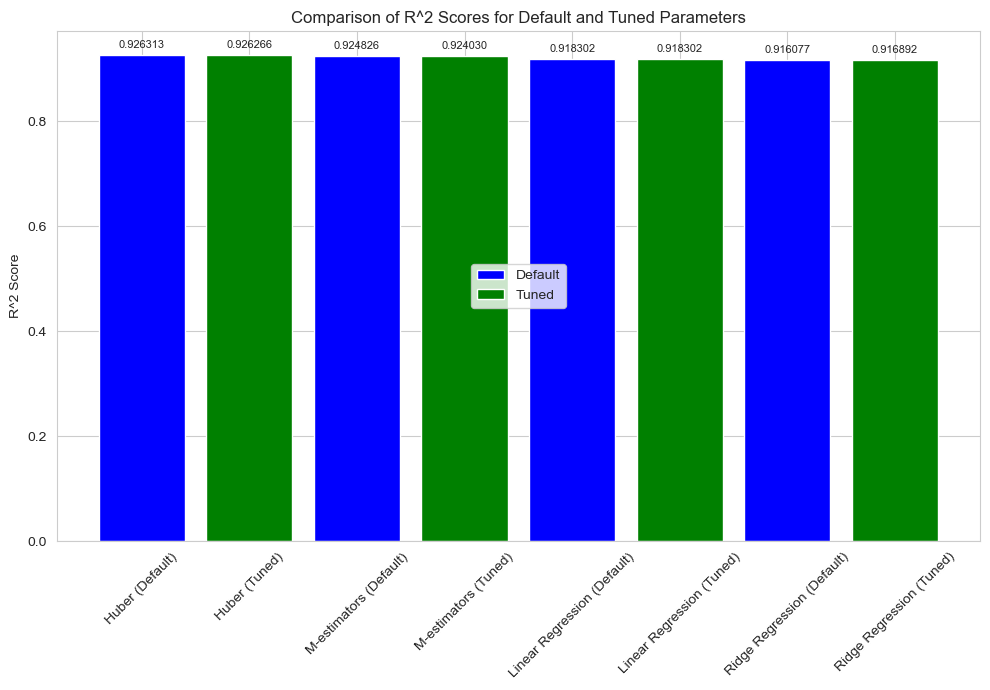

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Features based on SHAP Values
X = data[['Cire_CD', 'NDRE_CD']]
y = data['Seed']

# Splitting the data: 70% training, 20% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Definition
models = [
    ("Huber", HuberRegressor(max_iter=10000)),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge())
]

# Model Evaluation
results = []

# Evaluate models with default parameters
for name, model in models:
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train_scaled, y_train)
    predictions = pipeline.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    results.append(["Default", name, mae, mse, rmse, r2])

# Evaluate models with best hyperparameters
for name in best_params:
    model = tuned_models[name]
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train_scaled, y_train)
    predictions = pipeline.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    results.append(["Tuned", name, mae, mse, rmse, r2])

results_df = pd.DataFrame(results, columns=["Parameters", "Model", "MAE", "MSE", "RMSE", "R2"])

# Visualization
plt.figure(figsize=(10, 7))
for model_name in results_df["Model"].unique():
    subset_default = results_df[(results_df["Model"] == model_name) & (results_df["Parameters"] == "Default")]
    subset_tuned = results_df[(results_df["Model"] == model_name) & (results_df["Parameters"] == "Tuned")]
    
    if not subset_default.empty:
        plt.bar(model_name + " (Default)", subset_default["R2"].values[0], color='blue', label="Default" if model_name == "Huber" else "")
        plt.text(model_name + " (Default)", subset_default["R2"].values[0] + 0.01, f'{subset_default["R2"].values[0]:.6f}', ha='center', va='bottom', fontsize=8)
    
    if not subset_tuned.empty:
        plt.bar(model_name + " (Tuned)", subset_tuned["R2"].values[0], color='green', label="Tuned" if model_name == "Huber" else "")
        plt.text(model_name + " (Tuned)", subset_tuned["R2"].values[0] + 0.01, f'{subset_tuned["R2"].values[0]:.6f}', ha='center', va='bottom', fontsize=8)

plt.ylabel("R^2 Score")
plt.title("Comparison of R^2 Scores for Default and Tuned Parameters")
plt.xticks(rotation=45)
plt.legend(loc='center')
plt.tight_layout()
plt.show()

results_df.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/FeatureHayper4Model_Predict.csv", index=False)

# Ensembel 
Method 1:
P_Ensemble1 = (w1*P_Huber + w2*P_M-estimators" + w3*P_Linear Regression+ w4*P_Ridge Regression) / (w1 + w2 + w3 + w4)
Method 2:
P_Ensemble2 = (w1*P_Huber + w2*P_M-estimators" + w3*P_Linear Regression) / (w1 + w2 + w3)
Method 3:
P_Ensemble3 = (w1*P_Huber + w2*P_M-estimators" + w3*P_Ridge Regression) / (w1 + w2 + w3)
Method 4:
P_Ensemble4 = (w1*P_Huber + w2*P_M-estimators" ) / (w1 + w2)

In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, RANSACRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Features based on SHAP Values
X = data[['Cire_CD', 'NDRE_CD']]
y = data['Seed']

# Splitting the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#######################################
# Best hyperparameters obtained from previous runs
best_params = {
    "Huber": {'alpha': 1, 'epsilon': 1.0, 'max_iter': 100},
    "M-estimators": {'min_samples': 0.6, 'stop_probability': 0.97},
    "Linear Regression": {'fit_intercept': True},
    "Ridge Regression": {'alpha': 0.615848211066026, 'fit_intercept': True, 'solver': 'sparse_cg'}
}

# Initialize models with default parameters
default_models = {
    "Huber": HuberRegressor(),
    "M-estimators": RANSACRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge()
}

###########################################

# Initialize models with best parameters
tuned_models = {
    "Huber": HuberRegressor(**best_params["Huber"]),
    "M-estimators": RANSACRegressor(**best_params["M-estimators"]),
    "Linear Regression": LinearRegression(**best_params["Linear Regression"]),
    "Ridge Regression": Ridge(**best_params["Ridge Regression"])
}

# Define ensemble methods with weights
ensemble_methods = {
    #"Method 1": {"models": ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"], "weights": [0.3, 0.3, 0.2, 0.2]}, #0.922610
    #"Method 1": {"models": ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"], "weights": [0.4, 0.3, 0.2, 0.1]}, #0.923456 
    #"Method 1": {"models": ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"], "weights": [0.4, 0.3, 0.15, 0.15]},  #0.923425
    #"Method 2": {"models": ["Huber", "M-estimators", "Linear Regression"], "weights": [0.33, 0.33, 0.34]}, #0.923119
    #"Method 3": {"models": ["Huber", "M-estimators", "Ridge Regression"], "weights": [0.33, 0.33, 0.34]}, #0.922878
    #"Method 4": {"models": ["Huber", "M-estimators"], "weights": [0.5, 0.5]} #0.925205  
    #"Method 4": {"models": ["Huber", "M-estimators"], "weights": [0.6, 0.4]} #0.925427
   #"Method 4": {"models": ["Huber", "M-estimators"], "weights": [0.7, 0.3]} #0.925643
    #"Method 4": {"models": ["Huber", "M-estimators"], "weights": [0.9, 0.1]} #0.926063
    ##############
   "Method 1": {"models": ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"], "weights": [0.5, 0.3, 0.1, 0.1]},  #0.924202
   "Method 2": {"models": ["Huber", "M-estimators", "Linear Regression"], "weights": [0.45, 0.35, 0.2]}, #0.924131
   "Method 3": {"models": ["Huber", "M-estimators", "Ridge Regression"], "weights": [0.45, 0.35, 0.2]}, #0.924017
    "Method 4": {"models": ["Huber", "M-estimators"], "weights": [0.6, 0.4]} #0.925427

##########R2 Average

#  'Method 1': {"models": ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"], 
#               "weights": [0.2513278470241476, 0.2507210401303362, 0.24916677045882332,0.2487843423866929]}, #0.921905
#  'Method 2': {"models": ["Huber", "M-estimators", "Linear Regression"], 
#               "weights": [0.3345615130316149, 0.3337537464633044, 0.3316847405050807]}, #0.923174
#  'Method 3': {"models": ["Huber", "M-estimators", "Ridge Regression"], "weights":  [0.3347319180022578, 0.33392374000754893, 0.3313443419901932]}, #0.922944 
#  'Method 4': {"models": ["Huber", "M-estimators"], "weights": [0.5006043304838804, 0.4993956695161195]} #0.925207 

#######  Inverse Error Weighting (RSME)
#  'Method 1': {"models": ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"], 
#               "weights": [0.2579251773458206, 0.2541004588899792, 0.2450305006394422, 0.24294386312475802]},
#  'Method 2': {"models": ["Huber", "M-estimators", "Linear Regression"], 
#               "weights": [0.2579251773458206, 0.2541004588899792, 0.2450305006394422]},
#  'Method 3': {"models": ["Huber", "M-estimators", "Ridge Regression"], "weights":  [0.2579251773458206, 0.2541004588899792, 0.24294386312475802]},
#  'Method 4': {"models": ["Huber", "M-estimators"], "weights": [0.2579251773458206, 0.2541004588899792]}

}
 
results = []

# Compute weighted ensemble predictions
for method, details in ensemble_methods.items():
    predictions = np.zeros(X_test_scaled.shape[0])
    for model_name, weight in zip(details["models"], details["weights"]):
        model = tuned_models[model_name]
        model.fit(X_train_scaled, y_train)
        predictions += weight * model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    results.append({
        "Method": method,
        "Model": ", ".join(details["models"]),
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

results_df = pd.DataFrame(results)
print(results_df)



     Method                                              Model       MAE  \
0  Method 1  Huber, M-estimators, Linear Regression, Ridge ...  0.308433   
1  Method 2             Huber, M-estimators, Linear Regression  0.308890   
2  Method 3              Huber, M-estimators, Ridge Regression  0.311677   
3  Method 4                                Huber, M-estimators  0.291894   

        MSE      RMSE        R2  
0  0.531334  0.728926  0.924202  
1  0.531836  0.729271  0.924131  
2  0.532635  0.729818  0.924017  
3  0.522753  0.723016  0.925427  


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

X = data.drop(columns=["Seed"])
y = data['Seed']

# Splitting the data: 70% training, 20% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Definition
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor(max_iter=10000)),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))
]

# Model Evaluation
results = []

for name, model in models:
    # Using a pipeline to ensure that scaling is applied during cross-validation steps as well
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train_scaled, y_train)
    predictions = pipeline.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    results.append([name, mae, mse, rmse, r2])


results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])
print(results_df)
results_df.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/AllFeature_Predict.csv", index=False)


                 Model       MAE       MSE      RMSE        R2
0             CatBoost  0.721332  1.540553  1.241190  0.780232
1        Decision Tree  0.987037  4.735048  2.176017  0.324520
2           ElasticNet  0.878062  1.431269  1.196357  0.795822
3    Gradient Boosting  0.731750  1.653480  1.285877  0.764122
4                Huber  0.279325  0.517176  0.719150  0.926222
5                  KNN  1.067111  1.910847  1.382334  0.727407
6     Lasso Regression  1.092956  2.027035  1.423740  0.710832
7    Linear Regression  0.472390  0.672218  0.819889  0.904104
8         M-estimators  0.344178  0.547097  0.739660  0.921954
9   Passive Aggressive  0.934343  1.666785  1.291040  0.762224
10       Random Forest  0.597941  1.256146  1.120779  0.820804
11    Ridge Regression  0.456708  0.623057  0.789340  0.911118
12                 SVR  0.727065  1.438192  1.199246  0.794834
13             XGBoost  0.829684  2.203648  1.484469  0.685638


# To test the ensemble results both without and with hyperparameters

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, RANSACRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Features based on SHAP Values
X = data[['Cire_CD', 'NDRE_CD']]
y = data['Seed']

# Splitting the data: 70% training, 20% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Best hyperparameters obtained from previous runs
best_params = {
    "Huber": {'alpha': 1, 'epsilon': 1.0, 'max_iter': 100},
    "M-estimators": {'min_samples': 0.6, 'stop_probability': 0.97},
    "Linear Regression": {'fit_intercept': True},
    "Ridge Regression": {'alpha': 0.615848211066026, 'fit_intercept': True, 'solver': 'sparse_cg'}
}

# Initialize models with default parameters
default_models = {
    "Huber": HuberRegressor(),
    "M-estimators": RANSACRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge()
}

# Initialize models with best parameters
tuned_models = {
    "Huber": HuberRegressor(**best_params["Huber"]),
    "M-estimators": RANSACRegressor(**best_params["M-estimators"]),
    "Linear Regression": LinearRegression(**best_params["Linear Regression"]),
    "Ridge Regression": Ridge(**best_params["Ridge Regression"])
}

# Ensemble cases
cases = {
    "Method 1": ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"],
    "Method 2": ["Huber", "M-estimators", "Linear Regression"],
    "Method 3": ["Huber", "M-estimators", "Ridge Regression"],
    "Method 4": ["Huber", "M-estimators"]
}

results = []

# Evaluate ensemble cases for both default and tuned models
for model_set, models in [("Default", default_models), ("Tuned", tuned_models)]:
    for case, ensemble_models in cases.items():
        voting_regressor = VotingRegressor([(model_name, models[model_name]) for model_name in ensemble_models])
        voting_regressor.fit(X_train_scaled, y_train)

        y_pred = voting_regressor.predict(X_test_scaled)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results.append({
            "Model Set": model_set,
            "Method": case,
            "Model": ", ".join(ensemble_models),
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R2": r2
        })

results_df = pd.DataFrame(results)
print(results_df)


  Model Set    Method                                              Model  \
0   Default  Method 1  Huber, M-estimators, Linear Regression, Ridge ...   
1   Default  Method 2             Huber, M-estimators, Linear Regression   
2   Default  Method 3              Huber, M-estimators, Ridge Regression   
3   Default  Method 4                                Huber, M-estimators   
4     Tuned  Method 1  Huber, M-estimators, Linear Regression, Ridge ...   
5     Tuned  Method 2             Huber, M-estimators, Linear Regression   
6     Tuned  Method 3              Huber, M-estimators, Ridge Regression   
7     Tuned  Method 4                                Huber, M-estimators   

        MAE       MSE      RMSE        R2  
0  0.334384  0.546669  0.739370  0.922015  
1  0.316892  0.536430  0.732414  0.923475  
2  0.322381  0.539527  0.734525  0.923034  
3  0.288551  0.521537  0.722175  0.925600  
4  0.336676  0.547548  0.739965  0.921889  
5  0.321358  0.538625  0.733911  0.923162  
6  0.32

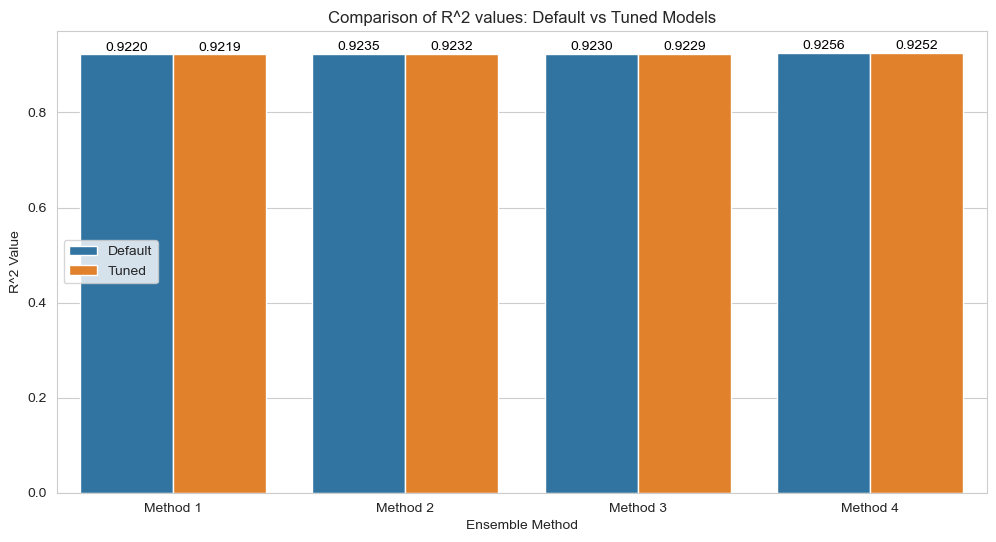

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of visualization
sns.set_style("whitegrid")

# Draw a barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Method', y='R2', hue='Model Set', data=results_df)

# Annotate the bar graph with exact R^2 values
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.4f}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', 
                       fontsize=10, color='black', 
                       xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Comparison of R^2 values: Default vs Tuned Models')
plt.ylabel('R^2 Value')
plt.xlabel('Ensemble Method')
plt.legend(loc='center left')
plt.show()


In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, RANSACRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")
#data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270.csv")

# Features based on SHAP Values
X = data[['Cire_CD', 'NDRE_CD']]
y = data['Seed']

# Splitting the data: 70% training, 20% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Best hyperparameters obtained from previous runs
# best_params = {
#     "Huber": {'alpha': 1, 'epsilon': 1.0, 'max_iter': 100},
#     "M-estimators": {'min_samples': 0.7, 'stop_probability': 0.96},
#     "Linear Regression": {'fit_intercept': True},
#     "Ridge Regression": {'alpha': 0.615848211066026, 'fit_intercept': True, 'solver': 'lsqr'}
# }

###############################
# Expanding hyperparameters grids
huber_params = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'epsilon': [1.0, 1.1, 1.2, 1.3, 1.4, 1.5],
    'max_iter': [100, 500, 1000, 5000]
}

ransac_params = {
    'min_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'stop_probability': [0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
}

ridge_params = {
    'alpha': np.logspace(-4, 4, 20),
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

linear_params = {
    'fit_intercept': [True, False]
}

# Hyperparameter tuning
for name, model, params in [("Huber", HuberRegressor(), huber_params), 
                            ("M-estimators", RANSACRegressor(), ransac_params),
                            ("Linear Regression", LinearRegression(), linear_params),
                            ("Ridge Regression", Ridge(), ridge_params)]:
    
    grid = GridSearchCV(model, param_grid=params, cv=5, verbose=2, n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    
    print(f"{name} Best Parameters: {grid.best_params_}")
    best_params[name] = grid.best_params_
    print(f"{name} R^2 Score with best parameters: {grid.score(X_test_scaled, y_test)}")
    print("-" * 50)
##############


# Initialize models with best parameters
models = {
    "Huber": HuberRegressor(**best_params["Huber"]),
    "M-estimators": RANSACRegressor(**best_params["M-estimators"]),
    "Linear Regression": LinearRegression(**best_params["Linear Regression"]),
    "Ridge Regression": Ridge(**best_params["Ridge Regression"])
}

# Ensemble cases
cases = {
    "Method 1": ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"],
    "Method 2": ["Huber", "M-estimators", "Linear Regression"],
    "Method 3": ["Huber", "M-estimators", "Ridge Regression"],
    "Method 4": ["Huber", "M-estimators"]
}

results = []

# Evaluate ensemble cases
for case, ensemble_models in cases.items():
    voting_regressor = VotingRegressor([(model_name, models[model_name]) for model_name in ensemble_models])
    voting_regressor.fit(X_train_scaled, y_train)
    
    y_pred = voting_regressor.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Method": case,
        "Model": ", ".join(ensemble_models),
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

results_df = pd.DataFrame(results)
print(results_df)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Huber Best Parameters: {'alpha': 1, 'epsilon': 1.0, 'max_iter': 100}
Huber R^2 Score with best parameters: 0.9262663750618146
--------------------------------------------------
Fitting 5 folds for each of 36 candidates, totalling 180 fits
M-estimators Best Parameters: {'min_samples': 0.6, 'stop_probability': 0.97}
M-estimators R^2 Score with best parameters: 0.9240299936911734
--------------------------------------------------
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Linear Regression Best Parameters: {'fit_intercept': True}
Linear Regression R^2 Score with best parameters: 0.9183017475715518
--------------------------------------------------
Fitting 5 folds for each of 280 candidates, totalling 1400 fits
Ridge Regression Best Parameters: {'alpha': 0.615848211066026, 'fit_intercept': True, 'solver': 'sparse_cg'}
Ridge Regression R^2 Score with best parameters: 0.9168923131059374
--------------------------

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, RANSACRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")
#data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270.csv")

# Features based on SHAP Values
X = data[['Cire_CD', 'NDRE_CD']]
y = data['Seed']

# Splitting the data: 70% training, 20% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Best hyperparameters obtained from previous runs
best_params = {
    "Huber": {'alpha': 1, 'epsilon': 1.0, 'max_iter': 100},
    "M-estimators": #{'min_samples': 0.7, 'stop_probability': 0.96},
     {'min_samples': 0.6, 'stop_probability': 0.97},
    "Linear Regression": {'fit_intercept': True},
    "Ridge Regression": #{'alpha': 0.615848211066026, 'fit_intercept': True, 'solver': 'lsqr'}
    {'alpha': 0.615848211066026, 'fit_intercept': True, 'solver': 'sparse_cg'}
}

# Initialize models with best parameters
models = {
    "Huber": HuberRegressor(**best_params["Huber"]),
    "M-estimators": RANSACRegressor(**best_params["M-estimators"]),
    "Linear Regression": LinearRegression(**best_params["Linear Regression"]),
    "Ridge Regression": Ridge(**best_params["Ridge Regression"])
}

# Ensemble cases
cases = {
    "Method 1": ["Huber", "M-estimators", "Linear Regression", "Ridge Regression"],
    "Method 2": ["Huber", "M-estimators", "Linear Regression"],
    "Method 3": ["Huber", "M-estimators", "Ridge Regression"],
    "Method 4": ["Huber", "M-estimators"]
}

results = []

# Evaluate ensemble cases
for case, ensemble_models in cases.items():
    voting_regressor = VotingRegressor([(model_name, models[model_name]) for model_name in ensemble_models])
    voting_regressor.fit(X_train_scaled, y_train)
    
    y_pred = voting_regressor.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Method": case,
        "Model": ", ".join(ensemble_models),
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

results_df = pd.DataFrame(results)
print(results_df)


     Method                                              Model       MAE  \
0  Method 1  Huber, M-estimators, Linear Regression, Ridge ...  0.336676   
1  Method 2             Huber, M-estimators, Linear Regression  0.321358   
2  Method 3              Huber, M-estimators, Ridge Regression  0.325438   
3  Method 4                                Huber, M-estimators  0.295329   

        MSE      RMSE        R2  
0  0.547548  0.739965  0.921889  
1  0.538625  0.733911  0.923162  
2  0.540265  0.735027  0.922928  
3  0.524304  0.724089  0.925205  


Hyperparameter tuning is an essential step in the machine learning workflow. The main goal is to search for the optimal combination of hyperparameters that provides the best model performance. GridSearchCV conducts an exhaustive search over a specified parameter grid and uses cross-validation to estimate the performance of each combination.

Let's break down the results you've provided:

### Huber Regressor:
1. **Total Combinations Tried**: 168
2. **Best Parameters**:
   - **alpha**: 1
   - **epsilon**: 1.0
   - **max_iter**: 100
3. **Best R^2 Score**: 0.926266375061814

### M-estimators (RANSAC Regressor):
1. **Total Combinations Tried**: 36
2. **Best Parameters**:
   - **min_samples**: 0.7
   - **stop_probability**: 0.96
3. **Best R^2 Score**: 0.9240299936911734

### Linear Regression:
1. **Total Combinations Tried**: 2
2. **Best Parameters**:
   - **fit_intercept**: True
3. **Best R^2 Score**: 0.9183017475715517

### Ridge Regression:
1. **Total Combinations Tried**: 280
2. **Best Parameters**:
   - **alpha**: 0.615848211066026
   - **fit_intercept**: True
   - **solver**: 'lsqr'
3. **Best R^2 Score**: 0.916892313105936

### Interpretation:

1. **Huber Regressor**:
   - The optimal parameters suggest a regularization strength of 1 (`alpha`), a threshold at which it becomes less sensitive to outliers (`epsilon`) of 1.0, and a maximum number of iterations of 100 for the solver to converge.
   - It achieved the highest R^2 score among the models listed, making it the best-performing model in terms of explained variance.

2. **M-estimators (RANSAC Regressor)**:
   - The best parameters indicate using 70% of the total samples for fitting the model and a stop probability of 0.96 to determine when to stop the algorithm.
   - This model also performed well, with an R^2 score very close to the Huber regressor.

3. **Linear Regression**:
   - The optimal parameter suggests fitting an intercept in the model.
   - While the R^2 score is slightly lower than the Huber and M-estimators, it still explains a significant portion of the variance.

4. **Ridge Regression**:
   - The best parameters suggest a regularization strength of approximately 0.6158, fitting an intercept in the model, and using the 'lsqr' solver for optimization.
   - The R^2 score for this model is just below that of linear regression, indicating that it explains slightly less variance in the dataset.

### Conclusion:

- Among the models tried, the **Huber regressor** showed the best performance with an R^2 score of approximately 0.9263.
- The hyperparameters obtained through GridSearchCV are essential as they dictate the behavior and performance of the model. Using these optimized parameters can significantly improve the model's accuracy and generalization capability compared to default or arbitrarily chosen values.
- Even though the differences in R^2 values among the models are not vast, in practical applications, even small improvements can lead to better predictions and better decision-making.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, RANSACRegressor

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Features based on SHAP Values
X = data[['Cire_CD', 'NDRE_CD']]
y = data['Seed']

# Splitting the data: 70% training, 20% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameters grids
huber_params = {
    'huberregressor__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'huberregressor__epsilon': [1.0, 1.1, 1.2, 1.3, 1.4, 1.5],
    'huberregressor__max_iter': [100, 500, 1000, 5000]
}

ransac_params = {
    'ransacregressor__min_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'ransacregressor__stop_probability': [0.95, 0.96, 0.97, 0.98, 0.99, 1.0]
}

ridge_params = {
    'ridge__alpha': np.logspace(-4, 4, 20),
    'ridge__fit_intercept': [True, False],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}


linear_params = {
    'linearregression__fit_intercept': [True, False]
}


# Models with hyperparameters
models = {
    "Huber": (HuberRegressor(), huber_params),
    "M-estimators": (RANSACRegressor(), ransac_params),
    "Linear Regression": (LinearRegression(), linear_params),
    "Ridge Regression": (Ridge(), ridge_params)
}

# Hyperparameter tuning using GridSearchCV
for name, (model, params) in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    grid = GridSearchCV(pipeline, param_grid=params, cv=5, verbose=2, n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    
    print(f"{name} Best Parameters: {grid.best_params_}")
    print(f"{name} R^2 Score with best parameters: {grid.score(X_test_scaled, y_test)}")
    print("-" * 50)


Fitting 5 folds for each of 168 candidates, totalling 840 fits
Huber Best Parameters: {'huberregressor__alpha': 1, 'huberregressor__epsilon': 1.0, 'huberregressor__max_iter': 100}
Huber R^2 Score with best parameters: 0.926266375061814
--------------------------------------------------
Fitting 5 folds for each of 36 candidates, totalling 180 fits
M-estimators Best Parameters: {'ransacregressor__min_samples': 0.7, 'ransacregressor__stop_probability': 0.96}
M-estimators R^2 Score with best parameters: 0.9240299936911734
--------------------------------------------------
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Linear Regression Best Parameters: {'linearregression__fit_intercept': True}
Linear Regression R^2 Score with best parameters: 0.9183017475715517
--------------------------------------------------
Fitting 5 folds for each of 280 candidates, totalling 1400 fits
Ridge Regression Best Parameters: {'ridge__alpha': 0.615848211066026, 'ridge__fit_intercept': True, 'rid

#  Scene 1 AllFeature
X = data.drop(columns=["Seed"])

<!-- #  Scene 2 RandomForest Importance
# Cire_CD	0.482617559
# NDRE_CD	0.354541855
# Cigr_CD	0.063682014
# EVI2_CD	0.033478144
# NDVI_CD	0.012708566 -->
X = data[['Cire_CD', 'NDRE_CD', 'Cigr_CD', 'EVI2_CD', 'NDVI_CD']]

<!-- # Scene 3 Recursive Feature Elimination (RFE) with Cross-Validation
# Cire_CD	1
# NDRE_CD	1
# Cigr_CD	1
# EVI2_CD	1
# NDVI_CV	1 -->
X = data[['Cire_CD', 'NDRE_CD', 'Cigr_CD', 'EVI2_CD', 'NDVI_CV']]

<!-- # Scene 4 Permutation Importance
# Cire_CD	0.514611609
# NDRE_CD	0.37727507
# Cigr_CD	0.020006638
# EVI2_CD	0.017325423 -->
X = data[['Cire_CD', 'NDRE_CD', 'Cigr_CD', 'EVI2_CD']]

<!-- # Scene 5 LASSO Regression Coefficients
# Cigr_CD	3.693758793
# Cigr_CV	0.160708645
# SoilHumi	0.019021926
# Wind speed	0.016769514 -->
X = data[['Cigr_CD', 'Cigr_CV', 'SoilHumi', 'Wind speed']]

<!-- # Scene 6 Correlation Coefficient
# NDRE_CD	0.942116219
# Evapotranspiration	0.142009364
# Humidity	0.13751761
# Temperature	0.129477815
# EC	0.126604079 -->
X = data[['NDRE_CD', 'Evapotranspiration', 'Humidity', 'Temperature', 'EC']]

<!-- # Scene 7 SHAP Values
# Cire_CD	1.162176551
# NDRE_CD	0.860072027 -->
X = data[['Cire_CD', 'NDRE_CD']]

     Feature Set               Model       MAE       MSE      RMSE        R2
0   All Features            CatBoost  0.721332  1.540553  1.241190  0.780232
1   All Features       Decision Tree  0.987037  4.735048  2.176017  0.324520
2   All Features          ElasticNet  0.878062  1.431269  1.196357  0.795822
3   All Features   Gradient Boosting  0.731750  1.653480  1.285877  0.764122
4   All Features               Huber  0.279325  0.517176  0.719150  0.926222
..           ...                 ...       ...       ...       ...       ...
93   SHAP Values  Passive Aggressive  1.176699  2.330451  1.526581  0.667549
94   SHAP Values       Random Forest  0.674711  1.742081  1.319879  0.751483
95   SHAP Values    Ridge Regression  0.390132  0.588294  0.767003  0.916077
96   SHAP Values                 SVR  0.538553  1.357540  1.165135  0.806340
97   SHAP Values             XGBoost  0.763426  2.624211  1.619942  0.625642

[98 rows x 6 columns]


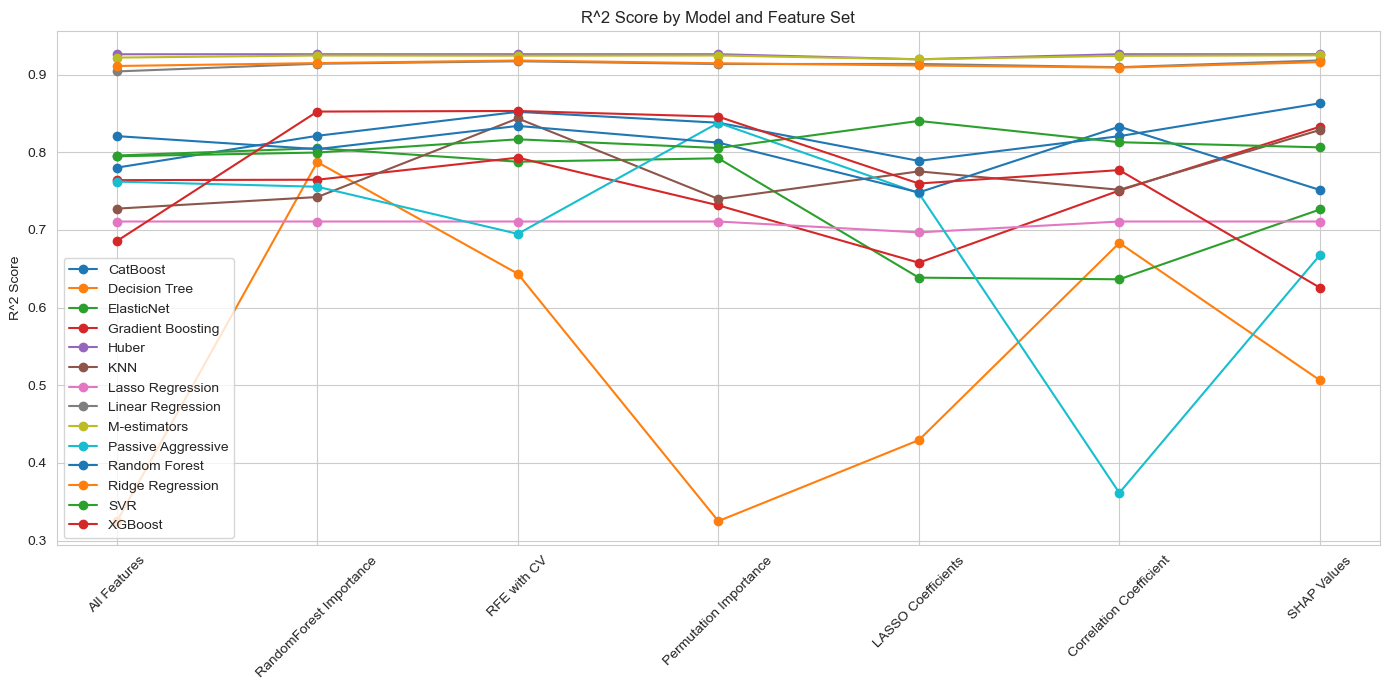

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# List of feature sets for each technique
feature_sets = {
    "All Features": list(data.drop(columns=["Seed"]).columns),
    "RandomForest Importance": ['Cire_CD', 'NDRE_CD', 'Cigr_CD', 'EVI2_CD', 'NDVI_CD'],
    "RFE with CV": ['Cire_CD', 'NDRE_CD', 'Cigr_CD', 'EVI2_CD', 'NDVI_CV'],
    "Permutation Importance": ['Cire_CD', 'NDRE_CD', 'Cigr_CD', 'EVI2_CD'],
    "LASSO Coefficients": ['Cigr_CD', 'Cigr_CV', 'SoilHumi', 'Wind speed'],
    "Correlation Coefficient": ['NDRE_CD', 'Evapotranspiration', 'Humidity', 'Temperature', 'EC'],
    "SHAP Values": ['Cire_CD', 'NDRE_CD']
}

# Models Definition
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor(max_iter=10000)),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))
]

all_results = []

# Loop through each feature set
for feature_set_name, features in feature_sets.items():
    X = data[features]
    y = data['Seed']

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = []

    for name, model in models:
        pipeline = make_pipeline(StandardScaler(), model)
        pipeline.fit(X_train_scaled, y_train)
        predictions = pipeline.predict(X_test_scaled)

        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = mean_squared_error(y_test, predictions, squared=False)
        r2 = r2_score(y_test, predictions)

        results.append([feature_set_name, name, mae, mse, rmse, r2])

    all_results.extend(results)

results_df = pd.DataFrame(all_results, columns=["Feature Set", "Model", "MAE", "MSE", "RMSE", "R2"])
print(results_df)

# Save to CSV
#results_df.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/performance_withFeatureSelection.csv", index=False)

# Visualization (example: plotting R2 scores)
plt.figure(figsize=(14, 7))
for model in results_df["Model"].unique():
    subset = results_df[results_df["Model"] == model]
    plt.plot(subset["Feature Set"], subset["R2"], label=model, marker='o')
plt.title("R^2 Score by Model and Feature Set")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


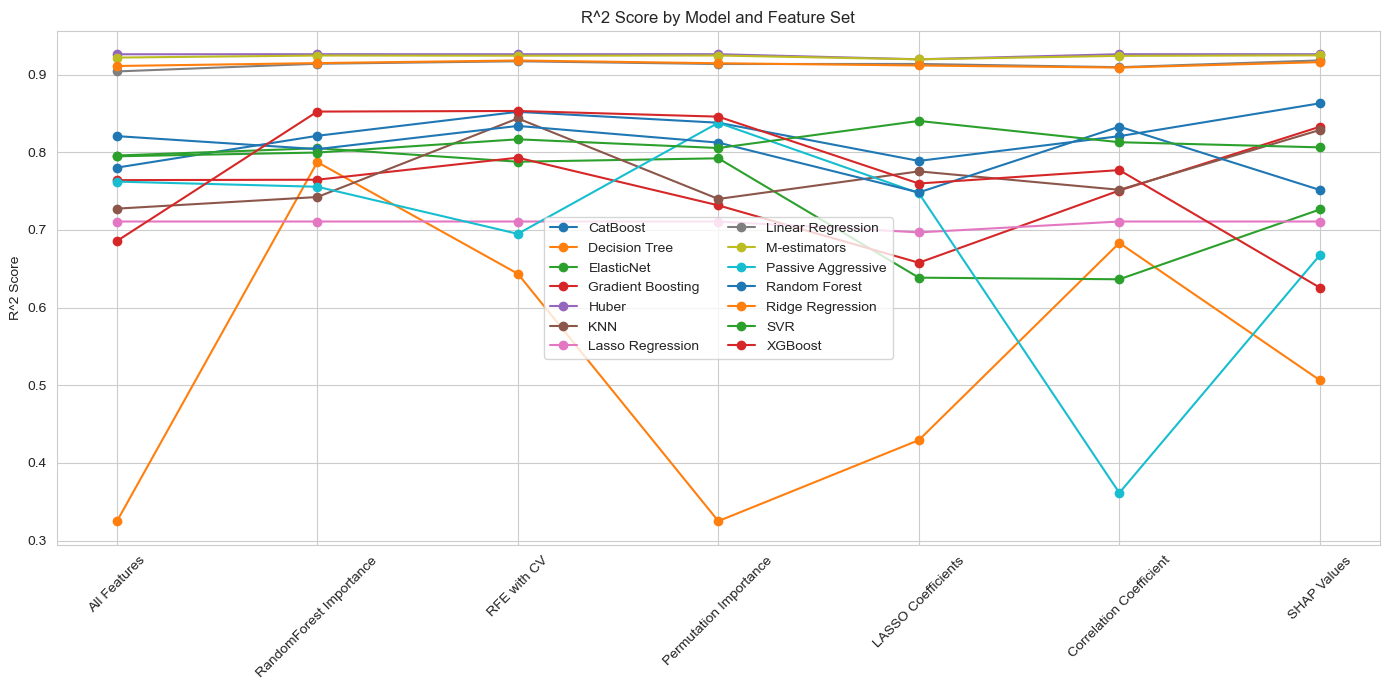

In [46]:

import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
results_df = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/performance_withFeatureSelection.csv")

# Visualization (example: plotting R2 scores)
plt.figure(figsize=(14, 7))
for model in results_df["Model"].unique():
    subset = results_df[results_df["Model"] == model]
    plt.plot(subset["Feature Set"], subset["R2"], label=model, marker='o')
plt.title("R^2 Score by Model and Feature Set")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Modifying the legend
num_models = len(results_df["Model"].unique())
plt.legend(loc='center', ncol=num_models//6)

plt.show()

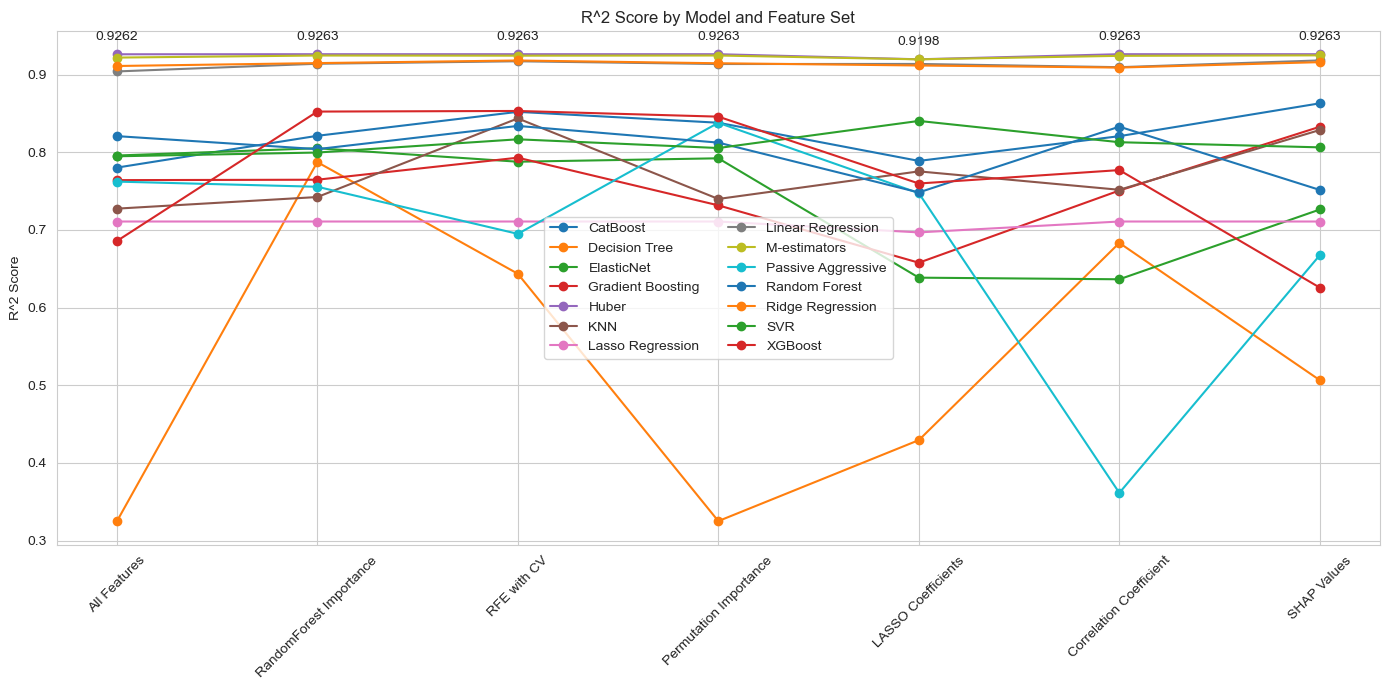

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
results_df = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/performance_withFeatureSelection.csv")
# Visualization
plt.figure(figsize=(14, 7))
for model in results_df["Model"].unique():
    subset = results_df[results_df["Model"] == model]
    plt.plot(subset["Feature Set"], subset["R2"], label=model, marker='o')
    
    # Annotate R2 values only for the "Huber" model
    if model == "Huber":
        for idx, row in subset.iterrows():
            plt.annotate(f"{row['R2']:.4f}", (row['Feature Set'], row['R2']), 
                         textcoords="offset points", xytext=(0,10), ha='center')

plt.title("R^2 Score by Model and Feature Set")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Modifying the legend
num_models = len(results_df["Model"].unique())
plt.legend(loc='center', ncol=num_models//6)

plt.show()


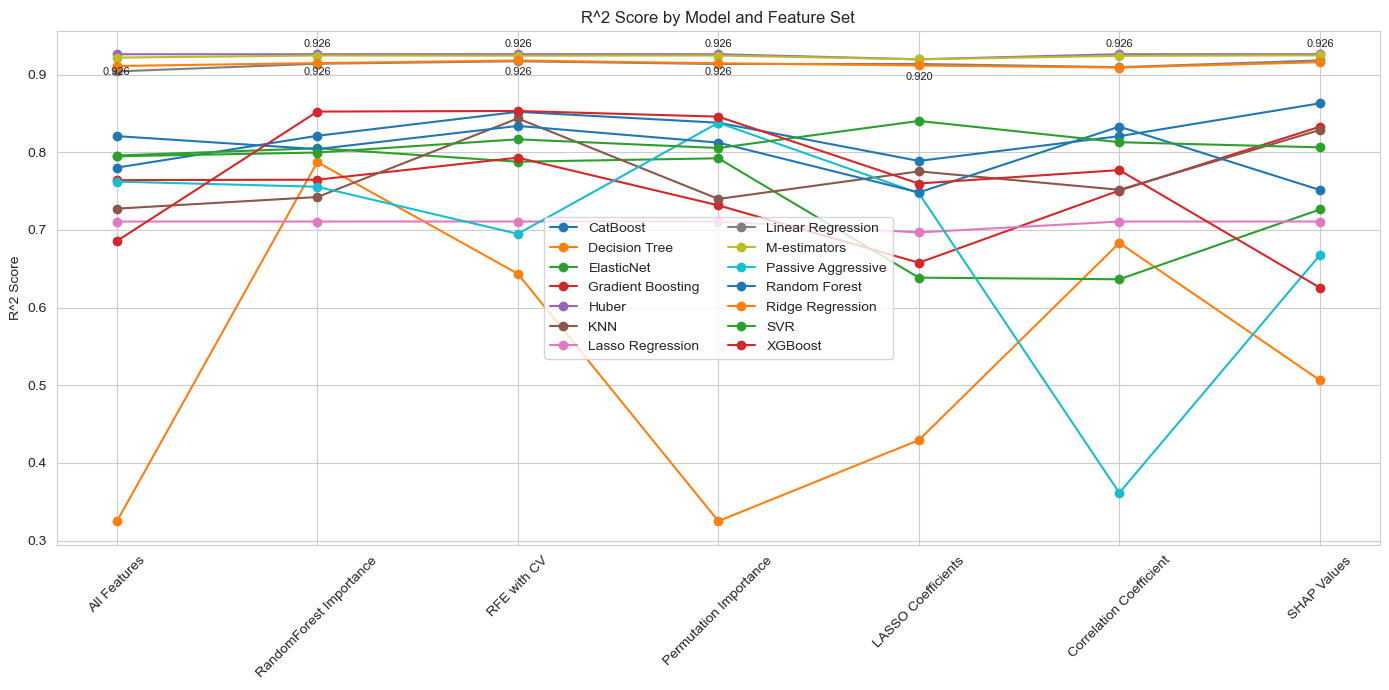

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
results_df = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/performance_withFeatureSelection.csv")

# Visualization
plt.figure(figsize=(14, 7))

# Iterate through each unique model in the dataset
for model in results_df["Model"].unique():
    subset = results_df[results_df["Model"] == model]
    plt.plot(subset["Feature Set"], subset["R2"], label=model, marker='o')

    # If the current model is "Huber", annotate the R^2 values
    if model == "Huber":
        # Sort values to get top 5 best and worst
        sorted_subset = subset.sort_values(by="R2", ascending=False)
        top_5_best = sorted_subset.head(5)
        top_5_worst = sorted_subset.tail(5)

        # Annotate top 5 best values
        for _, row in top_5_best.iterrows():
            plt.annotate(f"{row['R2']:.3f}", (row["Feature Set"], row["R2"]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

        # Annotate top 5 worst values
        for _, row in top_5_worst.iterrows():
            plt.annotate(f"{row['R2']:.4f}", (row["Feature Set"], row["R2"]), textcoords="offset points", xytext=(0,-15), ha='center', fontsize=8)

plt.title("R^2 Score by Model and Feature Set")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Modifying the legend
num_models = len(results_df["Model"].unique())
plt.legend(loc='center', ncol=num_models//6)

plt.show()


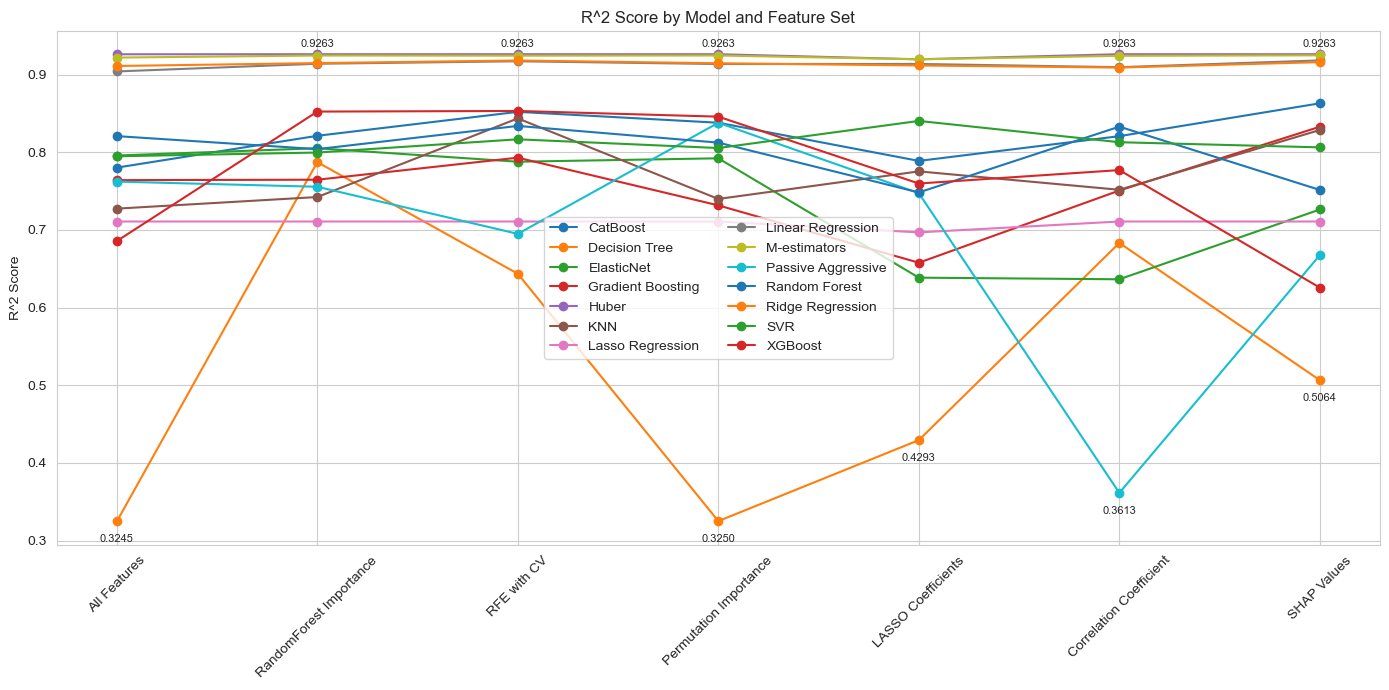

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
results_df = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/performance_withFeatureSelection.csv")

# Visualization
plt.figure(figsize=(14, 7))

# Get the top 5 and bottom 5 R^2 values across all models
sorted_df = results_df.sort_values(by="R2", ascending=False)
top_5_best = sorted_df.head(5)
top_5_worst = sorted_df.tail(5)

# Iterate through each unique model in the dataset
for model in results_df["Model"].unique():
    subset = results_df[results_df["Model"] == model]
    plt.plot(subset["Feature Set"], subset["R2"], label=model, marker='o')

# Annotate the top 5 best R^2 values
for _, row in top_5_best.iterrows():
    plt.annotate(f"{row['R2']:.4f}", (row["Feature Set"], row["R2"]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Annotate the top 5 worst R^2 values
for _, row in top_5_worst.iterrows():
    plt.annotate(f"{row['R2']:.4f}", (row["Feature Set"], row["R2"]), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=8)

plt.title("R^2 Score by Model and Feature Set")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Modifying the legend
num_models = len(results_df["Model"].unique())
plt.legend(loc='center', ncol=num_models//6)

plt.show()

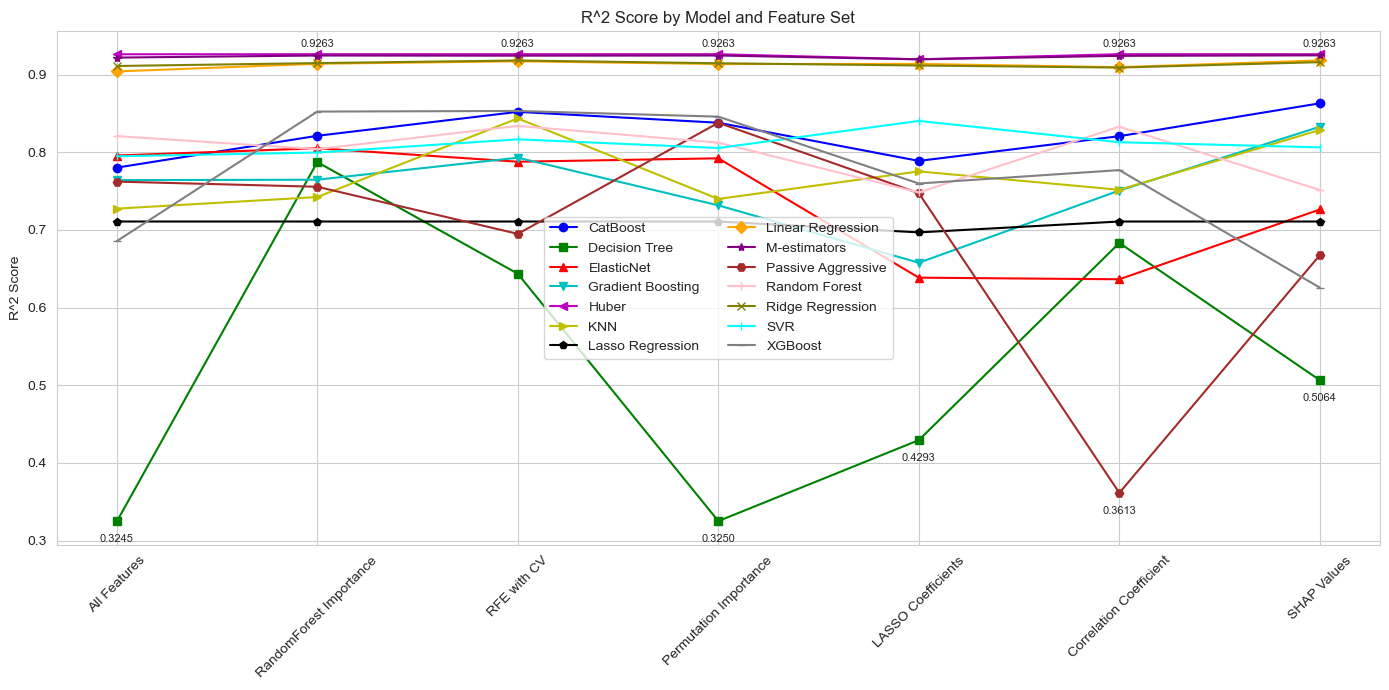

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
results_df = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/performance_withFeatureSelection.csv")

# Define distinct colors and markers
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'olive', 'cyan', 'gray']
markers = ['o', 's', '^', 'v', '<', '>', 'p', 'D', '*', 'H', '+', 'x', '|', '_']

# Visualization
plt.figure(figsize=(14, 7))

# Get the top 5 and bottom 5 R^2 values across all models
sorted_df = results_df.sort_values(by="R2", ascending=False)
top_5_best = sorted_df.head(5)
top_5_worst = sorted_df.tail(5)

# Iterate through each unique model in the dataset using distinct colors and markers
for idx, model in enumerate(results_df["Model"].unique()):
    subset = results_df[results_df["Model"] == model]
    plt.plot(subset["Feature Set"], subset["R2"], label=model, color=colors[idx], marker=markers[idx])

# Annotate the top 5 best R^2 values
for _, row in top_5_best.iterrows():
    plt.annotate(f"{row['R2']:.4f}", (row["Feature Set"], row["R2"]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Annotate the top 5 worst R^2 values
for _, row in top_5_worst.iterrows():
    plt.annotate(f"{row['R2']:.4f}", (row["Feature Set"], row["R2"]), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=8)

plt.title("R^2 Score by Model and Feature Set")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Modifying the legend
num_models = len(results_df["Model"].unique())
plt.legend(loc='center', ncol=num_models//6)

plt.show()

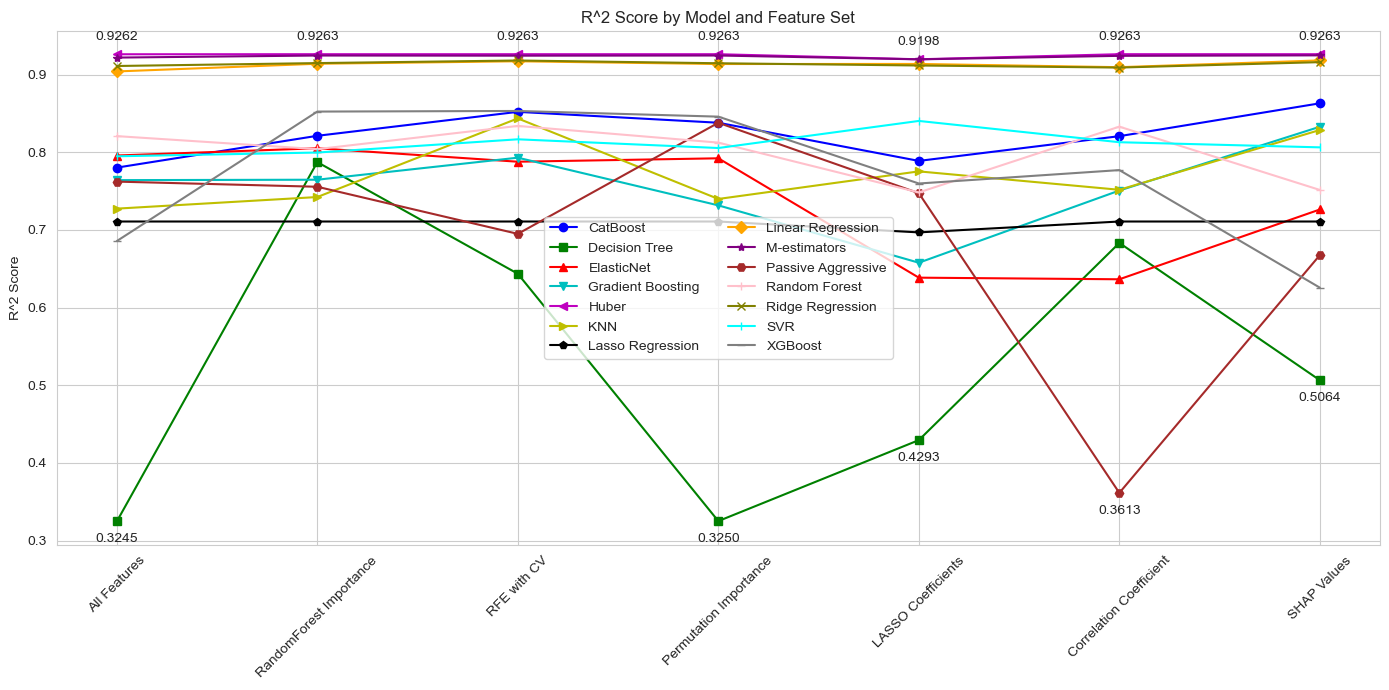

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
results_df = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/performance_withFeatureSelection.csv")

# Define distinct colors and markers
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'olive', 'cyan', 'gray']
markers = ['o', 's', '^', 'v', '<', '>', 'p', 'D', '*', 'H', '+', 'x', '|', '_']

# Visualization
plt.figure(figsize=(14, 7))

# Get the top 5 and bottom 5 R^2 values across all models
sorted_df = results_df.sort_values(by="R2", ascending=False)
top_5_best = sorted_df.head(5)
top_5_worst = sorted_df.tail(5)

# Iterate through each unique model in the dataset using distinct colors and markers
for idx, model in enumerate(results_df["Model"].unique()):
    subset = results_df[results_df["Model"] == model]
    plt.plot(subset["Feature Set"], subset["R2"], label=model, color=colors[idx], marker=markers[idx])

# Annotate the top 5 best R^2 values
# for _, row in top_5_best.iterrows():
#     plt.annotate(f"{row['R2']:.4f}", (row["Feature Set"], row["R2"]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Annotate the top 5 worst R^2 values
for _, row in top_5_worst.iterrows():
    plt.annotate(f"{row['R2']:.4f}", (row["Feature Set"], row["R2"]), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=10)

# Annotate all R^2 values for Huber model
huber_data = results_df[results_df["Model"] == "Huber"]
for _, row in huber_data.iterrows():
    plt.annotate(f"{row['R2']:.4f}", (row["Feature Set"], row["R2"]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10) #, color="red"

plt.title("R^2 Score by Model and Feature Set")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Modifying the legend
num_models = len(results_df["Model"].unique())
plt.legend(loc='center', ncol=num_models//6)

plt.show()

Top 10 Best Performances

In [61]:
# Top 10 Best Performances based on R2
top_10_best = results_df.nlargest(10, 'R2')

# Top 10 Worst Performances based on R2
top_10_worst = results_df.nsmallest(10, 'R2')

print("Top 10 Best Performances:")
print(top_10_best)

print("\nTop 10 Worst Performances:")
print(top_10_worst)


Top 10 Best Performances:
                Feature Set         Model       MAE       MSE      RMSE  \
88              SHAP Values         Huber  0.278809  0.516539  0.718707   
74  Correlation Coefficient         Huber  0.278873  0.516555  0.718717   
46   Permutation Importance         Huber  0.279073  0.516604  0.718752   
18  RandomForest Importance         Huber  0.279069  0.516617  0.718760   
32              RFE with CV         Huber  0.279063  0.516617  0.718761   
4              All Features         Huber  0.279325  0.517176  0.719150   
92              SHAP Values  M-estimators  0.299684  0.526963  0.725922   
50   Permutation Importance  M-estimators  0.303802  0.528391  0.726905   
22  RandomForest Importance  M-estimators  0.303904  0.528540  0.727007   
36              RFE with CV  M-estimators  0.304337  0.529960  0.727983   

          R2  
88  0.926313  
74  0.926311  
46  0.926304  
18  0.926302  
32  0.926302  
4   0.926222  
92  0.924826  
50  0.924622  
22  0.924601 

In [11]:
# Best Performance based on R2
best_performance = results_df[results_df["R2"] == results_df["R2"].max()]

# Worst Performance based on R2
worst_performance = results_df[results_df["R2"] == results_df["R2"].min()]

print("Best Performance:")
print(best_performance)

print("\nWorst Performance:")
print(worst_performance)


Best Performance:
    Feature Set  Model       MAE       MSE      RMSE        R2
88  SHAP Values  Huber  0.278809  0.516539  0.718707  0.926313

Worst Performance:
    Feature Set          Model       MAE       MSE      RMSE       R2
1  All Features  Decision Tree  0.987037  4.735048  2.176017  0.32452


# Computes the feature importance using all six methods:
RandomForest Importance
Recursive Feature Elimination (RFE) with Cross-Validation
Permutation Importance
LASSO Regression Coefficients
Correlation Coefficient
SHAP Values

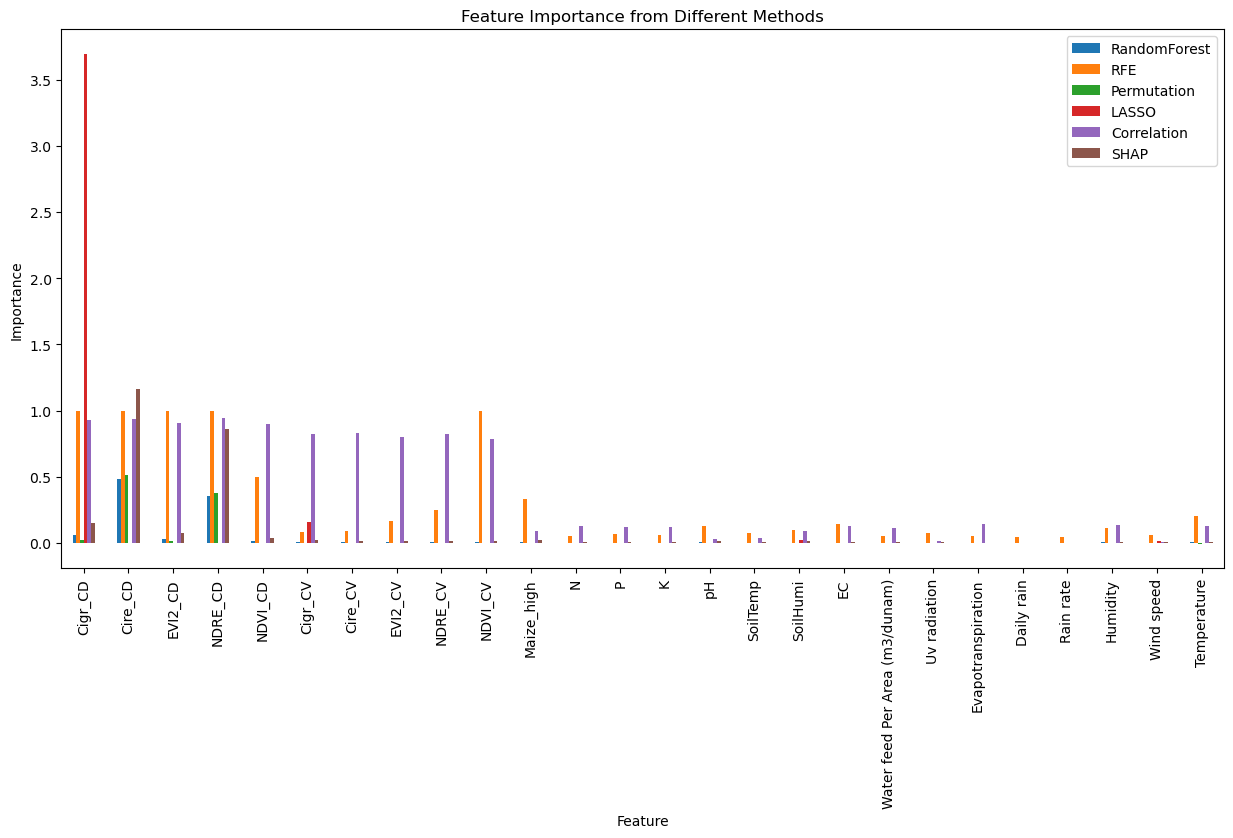

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Features and target
X = data.drop(columns=["Seed"])
y = data['Seed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. RandomForest Importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_importance = rf.feature_importances_

# 2. Recursive Feature Elimination (RFE) with Cross-Validation
selector = RFECV(estimator=RandomForestRegressor(random_state=42), step=1, cv=5)
selector = selector.fit(X_train, y_train)
rfe_importance = selector.ranking_

# 3. Permutation Importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_importance_scores = perm_importance.importances_mean

# 4. LASSO Regression Coefficients
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

# 5. Correlation Coefficient
correlation_coef = X_train.corrwith(y_train)

# 6. SHAP Values
explainer = shap.Explainer(rf)
shap_values = explainer.shap_values(X_train)
shap_importance = np.abs(shap_values).mean(axis=0)

# Consolidate results
results_df = pd.DataFrame({
    'Feature': X.columns,
    'RandomForest': rf_importance,
    'RFE': 1/rfe_importance,  # Inverse because ranking 1 is best, 2 is second best, etc.
    'Permutation': perm_importance_scores,
    'LASSO': np.abs(lasso_coef),  # Taking absolute values since we're interested in magnitude of effect
    'Correlation': np.abs(correlation_coef),  # Same reason for absolute
    'SHAP': shap_importance
})

# Save to CSV
results_df.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/8Oct_Result/feature_importance_comparison.csv", index=False)

# Visualization
results_df.set_index('Feature').plot(kind='bar', figsize=(15, 7))
plt.title('Feature Importance from Different Methods')
plt.ylabel('Importance')
plt.show()


In [1]:
#**Permutation Importance** and **LASSO Regression**
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Split the dataset
X = data.drop(columns=["Seed"])
y = data['Seed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a RandomForest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

# Compute Permutation Importance
perm_importance = permutation_importance(rf, X_test_scaled, y_test, n_repeats=30, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# Print the features based on their permutation importance
print("Features based on Permutation Importance:")
for i in sorted_idx[::-1]:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]:.4f}")

# Train a Lasso model and get the coefficients
lasso = Lasso(alpha=0.01)  # You might need to adjust the alpha value based on your data
lasso.fit(X_train_scaled, y_train)
lasso_importance = lasso.coef_

# Print the features based on their LASSO coefficients
print("\nFeatures based on LASSO Regression:")
for i, coef in enumerate(lasso_importance):
    print(f"{X.columns[i]}: {coef:.4f}")

Features based on Permutation Importance:
NDRE_CD: 0.3931
Cire_CD: 0.3744
Cigr_CD: 0.0363
EVI2_CD: 0.0176
NDVI_CD: 0.0112
SoilHumi: 0.0013
Cigr_CV: 0.0012
pH: 0.0006
Wind speed: 0.0004
P: 0.0004
Evapotranspiration: 0.0003
SoilTemp: 0.0003
K: 0.0001
Cire_CV: 0.0000
Daily rain: 0.0000
Rain rate: 0.0000
N: -0.0001
Water feed Per Area (m3/dunam): -0.0006
Uv radiation: -0.0007
EC: -0.0010
Maize_high: -0.0019
EVI2_CV: -0.0019
NDVI_CV: -0.0025
NDRE_CV: -0.0039
Humidity: -0.0040
Temperature: -0.0088

Features based on LASSO Regression:
Cigr_CD: -0.0000
Cire_CD: 0.3444
EVI2_CD: 0.0000
NDRE_CD: 2.3763
NDVI_CD: 0.0000
Cigr_CV: -0.1510
Cire_CV: -0.0000
EVI2_CV: -0.0000
NDRE_CV: -0.0000
NDVI_CV: -0.0000
Maize_high: -0.0000
N: 0.0000
P: -0.0000
K: 0.0000
pH: 0.0102
SoilTemp: -0.0825
SoilHumi: -0.1643
EC: 0.0344
Water feed Per Area (m3/dunam): -0.0000
Uv radiation: -0.0239
Evapotranspiration: 0.1105
Daily rain: 0.0000
Rain rate: 0.0000
Humidity: 0.0378
Wind speed: -0.0997
Temperature: -0.0000


# 1. Correlation Coefficient:

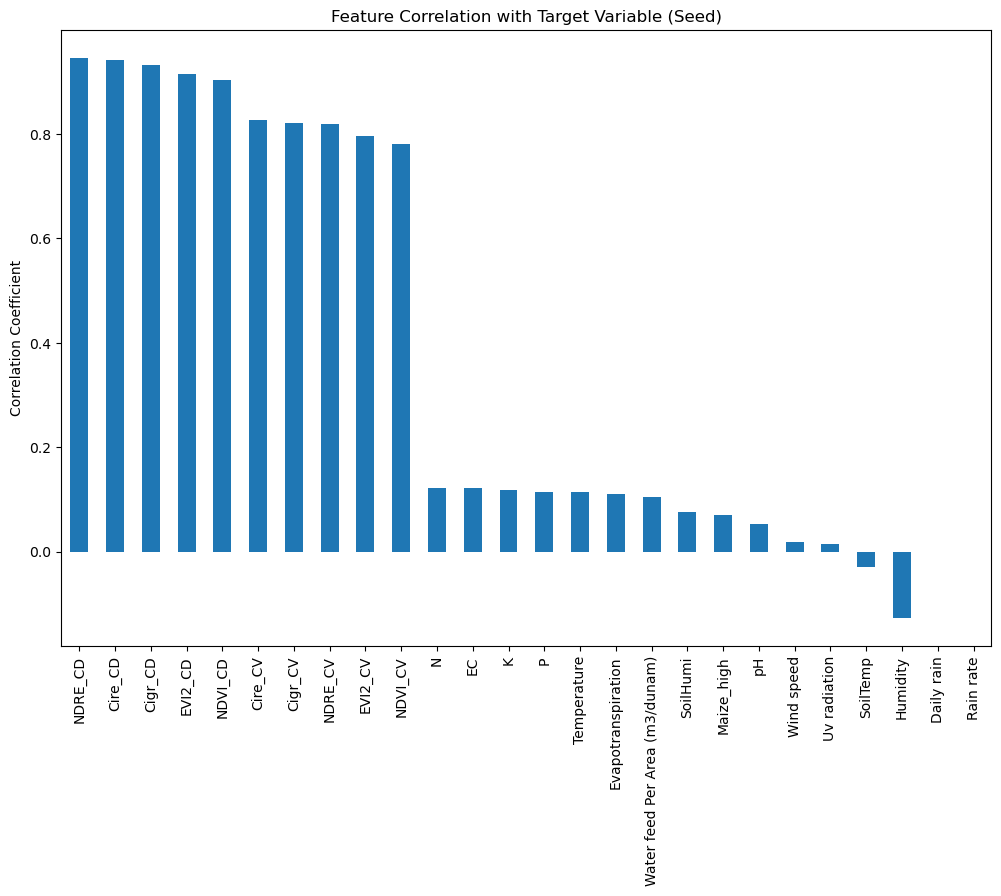

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Calculate correlation with the target variable
correlation_with_target = data.corr()['Seed'].sort_values(ascending=False)

# Plotting the correlation coefficients
plt.figure(figsize=(12, 8))
correlation_with_target.drop('Seed').plot(kind='bar')
plt.title('Feature Correlation with Target Variable (Seed)')
plt.ylabel('Correlation Coefficient')
plt.show()


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


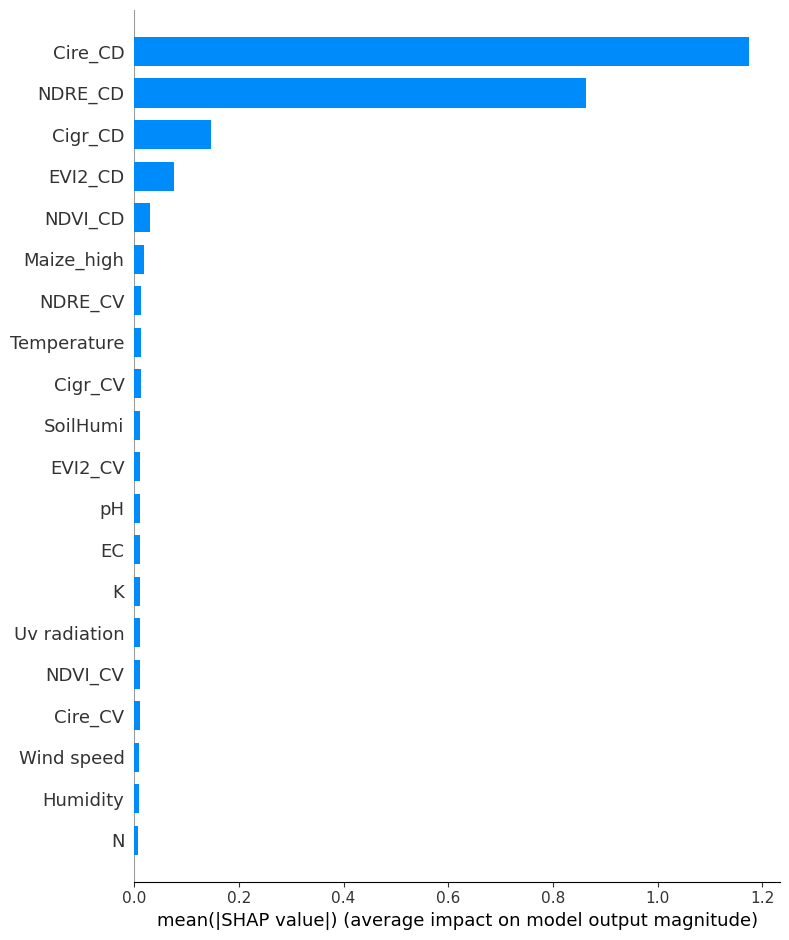

In [3]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/5VI_CD_CV_16ENV_270_01.csv")

# Feature and target selection
X = data.drop(columns=["Seed"])
y = data['Seed']

# Splitting the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")
